C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


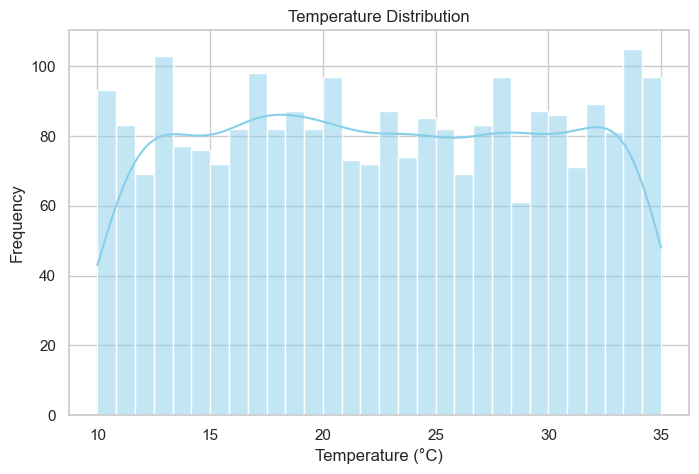

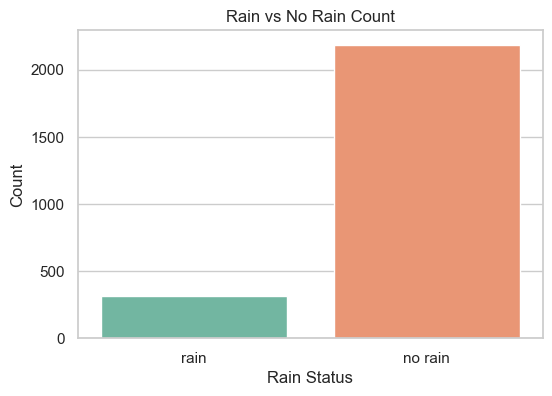

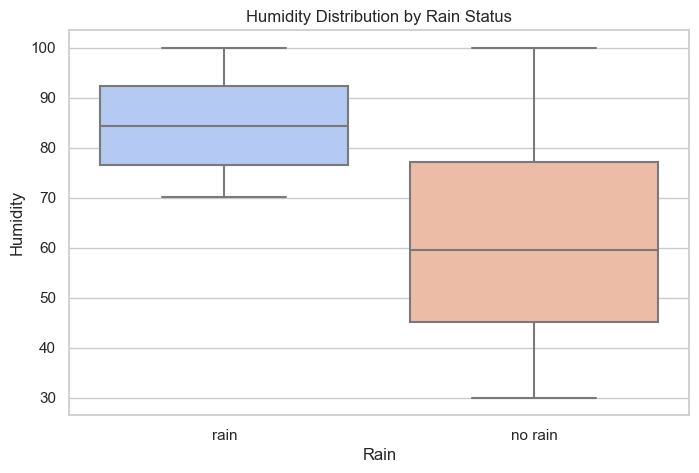

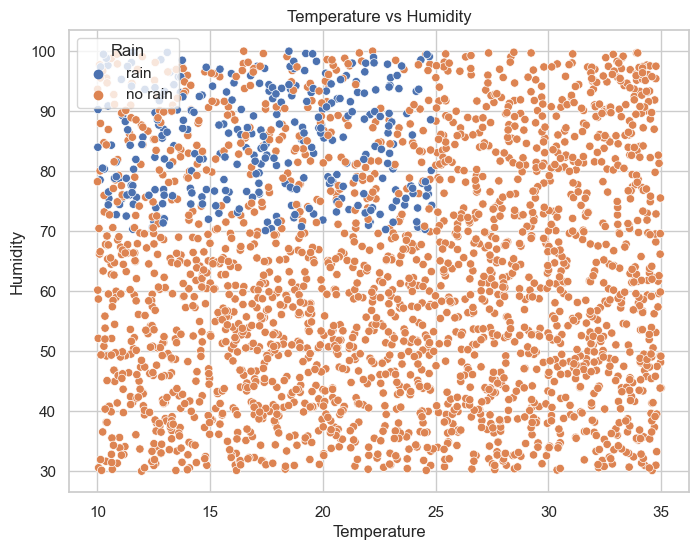

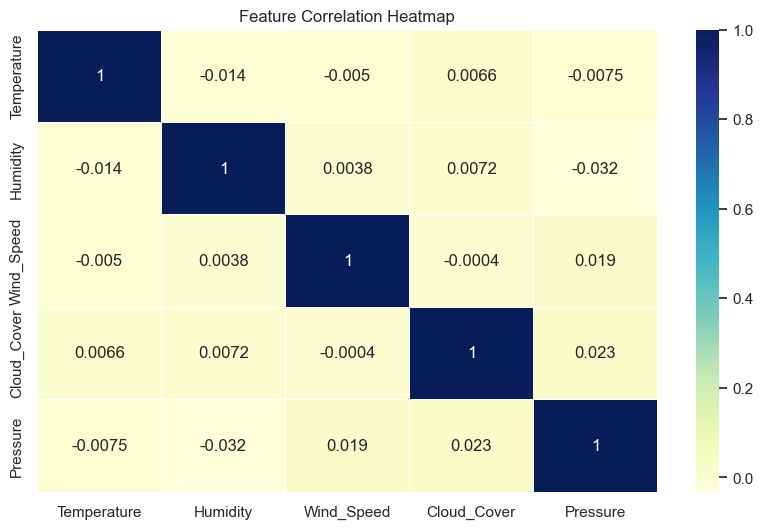

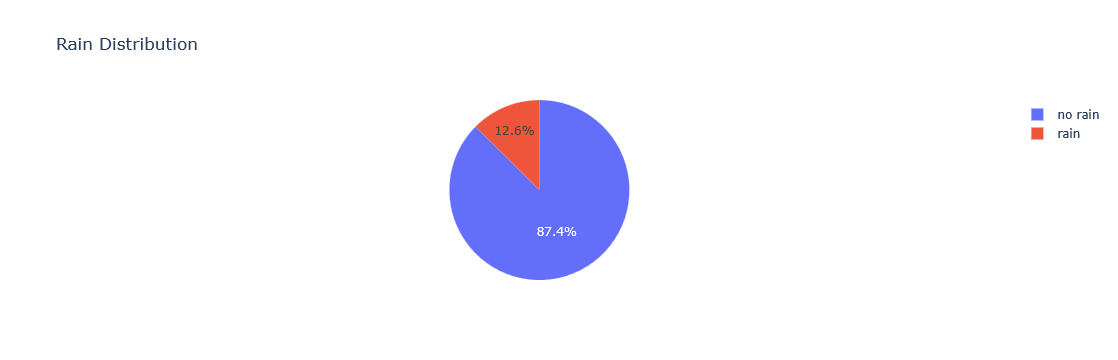

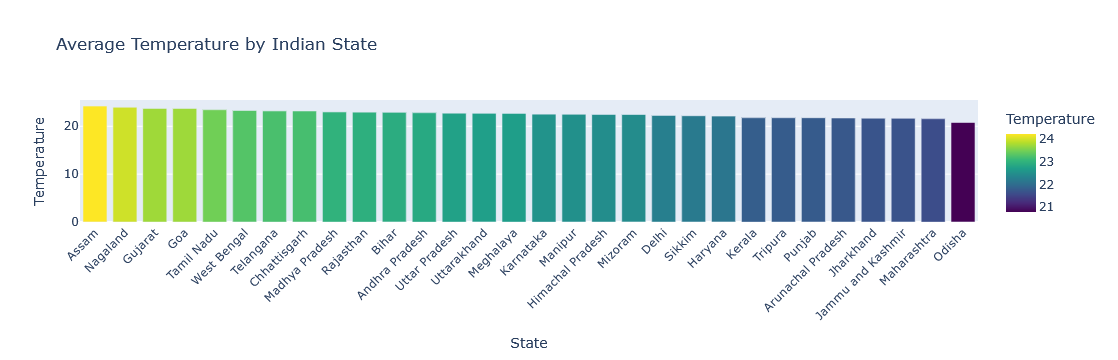

Notebook executed successfully. Updated dataset saved as 'updated_weather_forecast_data.csv'.


In [1]:

# -------------------------------
# 📦 Step 1: Import Libraries
# -------------------------------
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Jupyter inline magic (for notebooks)
%matplotlib inline

# -------------------------------

# 📂 Step 2: Load the Dataset
# -------------------------------
# Replace with your path if needed
file_path = "updated_weather_forecast_data.csv"
df = pd.read_csv(file_path)

# -------------------------------
# 🌍 Step 3: Add Random Indian States
# -------------------------------
indian_states = [
    "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh", "Goa",
    "Gujarat", "Haryana", "Himachal Pradesh", "Jharkhand", "Karnataka", "Kerala",
    "Madhya Pradesh", "Maharashtra", "Manipur", "Meghalaya", "Mizoram", "Nagaland",
    "Odisha", "Punjab", "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", "Tripura",
    "Uttar Pradesh", "Uttarakhand", "West Bengal", "Delhi", "Jammu and Kashmir"
]

df["State"] = [random.choice(indian_states) for _ in range(len(df))]

# -------------------------------
# 💾 Step 4: Save Updated Dataset
# -------------------------------
df.to_csv("updated_weather_forecast_data.csv", index=False)

# -------------------------------
# 📊 Step 5: Data Visualization
# -------------------------------

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Temperature distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Temperature"], kde=True, bins=30, color="skyblue")
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

# 2. Rain vs No Rain (count plot)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Rain", palette="Set2")
plt.title("Rain vs No Rain Count")
plt.xlabel("Rain Status")
plt.ylabel("Count")
plt.show()

# 3. Boxplot: Humidity by Rain
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Rain", y="Humidity", palette="coolwarm")
plt.title("Humidity Distribution by Rain Status")
plt.show()

# 4. Scatter Plot: Temperature vs Humidity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Temperature", y="Humidity", hue="Rain", palette="deep")
plt.title("Temperature vs Humidity")
plt.show()

# 5. Heatmap: Correlation Matrix
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=["float64", "int64"]).corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 6. Interactive Plotly Pie Chart: Rain distribution
fig = px.pie(df, names="Rain", title="Rain Distribution")
fig.show()

# 7. Plotly Bar Chart: Average Temperature by State
avg_temp_by_state = df.groupby("State")["Temperature"].mean().reset_index()
fig = px.bar(avg_temp_by_state.sort_values("Temperature", ascending=False),
             x="State", y="Temperature",
             title="Average Temperature by Indian State",
             color="Temperature", color_continuous_scale="Viridis")
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# -------------------------------
# ✅ Done!
# -------------------------------
print("Notebook executed successfully. Updated dataset saved as 'updated_weather_forecast_data.csv'.")
